<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture7%7CAdvancedFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture7 : Advanced Features

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-bio geopandas libpysal splot pygeos

     |████████████████████████████████| 8.4MB 2.7MB/s 
     |████████████████████████████████| 972kB 46.6MB/s 
     |████████████████████████████████| 2.4MB 20.8MB/s 
     |████████████████████████████████| 1.6MB 34.4MB/s 
     |████████████████████████████████| 10.9MB 43.9MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 266kB 33.7MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 235kB 48.8MB/s 
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp36-cp36m-linux_x86_64.whl size=1453814 sha256=4d7be0d894aeb820651d2cde06285a4be62644a712bfe6166b99a8906b4ef271
  Stored in directory: /root/.cache/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379082 sha256=f0254caa3ca873aa2bbd94b70212beef6d45dfc8a188b4556f06fc2baa44d598
  Stor

# K-Nearest-Neighbors (KNN)

Intro with sklearn and a quick example

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets, neighbors
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_decision_regions

In [4]:
!wget https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/Data/Lecture7/data_ushape.csv

--2020-08-30 20:26:20--  https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/Data/Lecture7/data_ushape.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2880 (2.8K) [text/plain]
Saving to: ‘data_ushape.csv’

data_ushape.csv     100%[===================>]   2.81K  --.-KB/s    in 0s      

2020-08-30 20:26:20 (36.4 MB/s) - ‘data_ushape.csv’ saved [2880/2880]



In [11]:
data = pd.read_csv("data_ushape.csv")
data.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [24]:
X = data[["X","Y"]].values
y = data["class"].astype(int).values

In [19]:
k_ex = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=k_ex)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

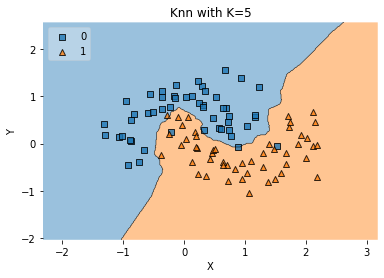

In [20]:
# Plotting decision region
plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with K="+ str(k_ex))
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# creating a list of k for KNN
k_list = list(range(1,50,2))
# creating a list of cv scores 
cv_scores = []

# perform 10-fold cross validation 
for k in k_list: 
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
  cv_scores.append(scores.mean())


<Figure size 432x288 with 0 Axes>

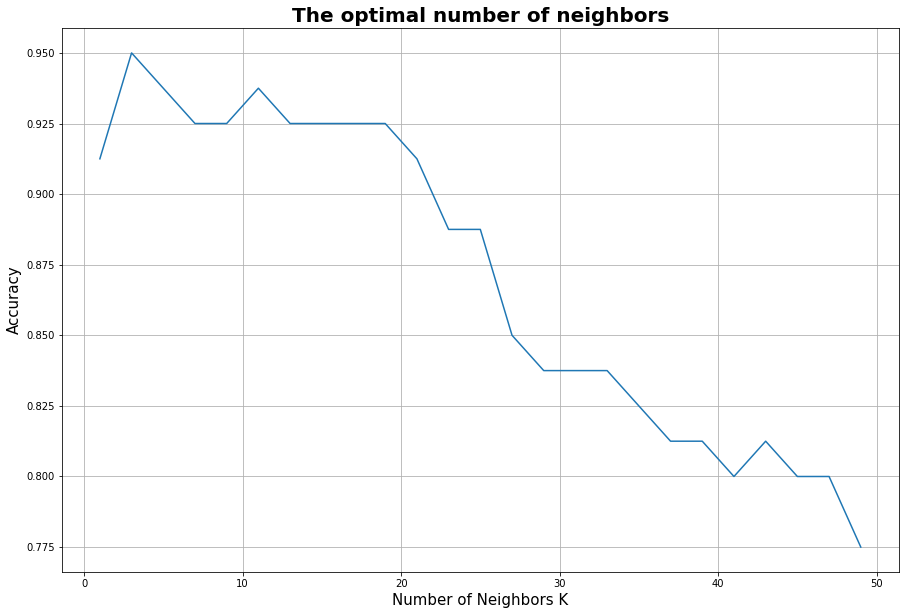

In [31]:
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.plot(k_list, cv_scores)

In [34]:
best_k = k_list[cv_scores.index(max(cv_scores))]
worst_k = k_list[cv_scores.index(min(cv_scores))]
print("Optimal number of neighbors: " + str(best_k))

Optimal number of neighbors: 3


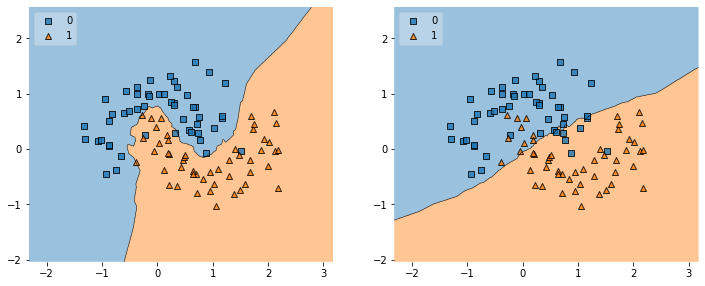

In [38]:
figure, axis = plt.subplots(1,2, 
                            subplot_kw = dict(aspect = "equal"),
                            figsize=(12,8))

best_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
#Use all your data now !! 
best_clf.fit(X, y)

worst_clf = neighbors.KNeighborsClassifier(n_neighbors=worst_k) 
worst_clf.fit(X,y)

# Plotting decision region
plot_decision_regions(X, y, clf=best_clf, legend=2, ax = axis[0])

plot_decision_regions(X, y, clf=worst_clf, legend=2, ax = axis[1])

### A Use Case (KNN in Spatial Weights Matrices and Geo-Data)

In [3]:
!wget https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson

--2020-08-30 14:56:19--  https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37928373 (36M) [text/plain]
Saving to: ‘limits_IT_municipalities.geojson’

limits_IT_municipal 100%[===================>]  36.17M  54.5MB/s    in 0.7s    

2020-08-30 14:56:21 (54.5 MB/s) - ‘limits_IT_municipalities.geojson’ saved [37928373/37928373]



In [4]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
import libpysal.weights as lp 
from splot.libpysal import plot_spatial_weights

In [5]:
municip = gpd.read_file("limits_IT_municipalities.geojson")
piemonte_municip = municip[municip.reg_name == "Piemonte"]
torino_prov = piemonte_municip[piemonte_municip.prov_name == "Torino"]
torino_prov.head()

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
0,Agliè,130,1010810010,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,None,None,None,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,131,1010810020,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,None,None,None,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,132,1010810030,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,None,None,None,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,133,1010810040,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,None,None,None,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,135,1010810060,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,None,None,None,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


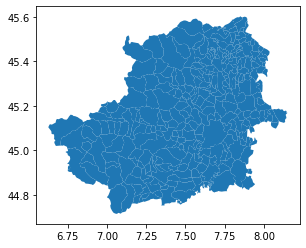

In [6]:
torino_prov.plot()

In [7]:
torino_prov.shape

(312, 18)

In [8]:
import libpysal
libpysal.__version__

'4.3.0'

### Constructing Adjacency Matrix

In [9]:
w_queen = lp.Queen.from_dataframe(torino_prov, geom_col= "geometry")

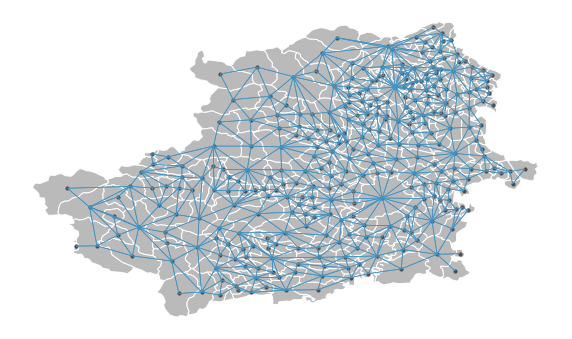

In [11]:
plot_spatial_weights(w_queen, torino_prov)
plt.show()

In [10]:
w_queen.neighbors[4]

[224, 278, 296, 11, 60]

In [26]:
torino_prov[torino_prov.name == "Torino"]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
267,Torino,401,1010812620,Torino,001,1,TO,Piemonte,01,1,272,L219,001272,1272,None,None,None,"MULTIPOLYGON (((7.66882 45.13802, 7.69016 45.1..."


In [27]:
torino_prov.loc[[267]]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
267,Torino,401,1010812620,Torino,001,1,TO,Piemonte,01,1,272,L219,001272,1272,None,None,None,"MULTIPOLYGON (((7.66882 45.13802, 7.69016 45.1..."


In [28]:
torino_prov.loc[w_queen.neighbors[267]]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
160,Nichelino,293,1010811620,Torino,001,1,TO,Piemonte,01,1,164,F889,001164,1164,None,None,None,"MULTIPOLYGON (((7.62415 45.00813, 7.62902 45.0..."
260,Settimo Torinese,394,1010812550,Torino,001,1,TO,Piemonte,01,1,265,I703,001265,1265,None,None,None,"MULTIPOLYGON (((7.77262 45.12362, 7.77017 45.1..."
167,Orbassano,300,1010811680,Torino,001,1,TO,Piemonte,01,1,171,G087,001171,1171,None,None,None,"MULTIPOLYGON (((7.57622 45.04024, 7.57985 45.0..."
16,Baldissero Torinese,147,1010810180,Torino,001,1,TO,Piemonte,01,1,18,A591,001018,1018,None,None,None,"MULTIPOLYGON (((7.78759 45.09177, 7.78938 45.0..."
178,Pecetto Torinese,312,1010811790,Torino,001,1,TO,Piemonte,01,1,183,G398,001183,1183,None,None,None,"MULTIPOLYGON (((7.74806 45.03629, 7.74882 45.0..."
244,San Mauro Torinese,377,1010812390,Torino,001,1,TO,Piemonte,01,1,249,I030,001249,1249,None,None,None,"MULTIPOLYGON (((7.74220 45.11812, 7.74962 45.1..."
309,Mappano,8269,1010811415,Torino,001,1,TO,Piemonte,01,1,316,M316,001316,1316,None,None,None,"MULTIPOLYGON (((7.72255 45.14794, 7.72867 45.1..."
22,Beinasco,153,1010810240,Torino,001,1,TO,Piemonte,01,1,24,A734,001024,1024,None,None,None,"MULTIPOLYGON (((7.59568 45.03108, 7.59774 45.0..."
118,Grugliasco,249,1010811180,Torino,001,1,TO,Piemonte,01,1,120,E216,001120,1120,None,None,None,"MULTIPOLYGON (((7.55885 45.07001, 7.56487 45.0..."
88,Collegno,219,1010810880,Torino,001,1,TO,Piemonte,01,1,90,C860,001090,1090,None,None,None,"MULTIPOLYGON (((7.60746 45.12016, 7.61685 45.1..."


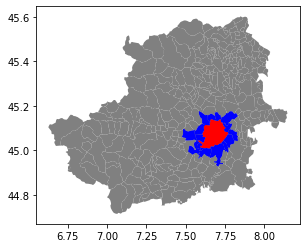

In [29]:
figure, axis = plt.subplots(1,1)
torino_prov.plot(color = "grey", ax = axis)
torino_prov.loc[[267]].plot(color = "r", ax = axis)
torino_prov.loc[w_queen.neighbors[267]].plot(color = "b", ax = axis)

In [ ]:
w_knn5 = lp.KNN.from_dataframe(torino_prov, k = 5)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff021214208>)

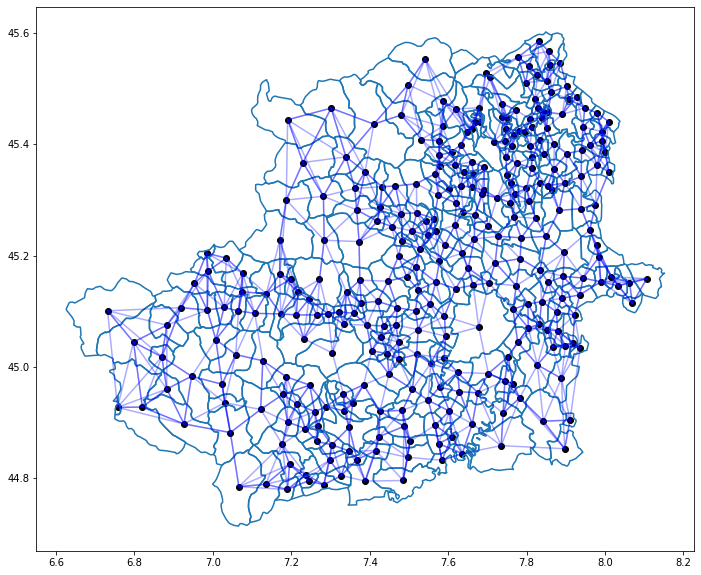

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33), ax = axis)

In [ ]:
len(w_knn5.asymmetries)

652

In [ ]:
w_knn5.nonzero

1560

In [ ]:
w_knn3 = lp.KNN.from_dataframe(torino_prov, k = 3)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff023c258d0>)

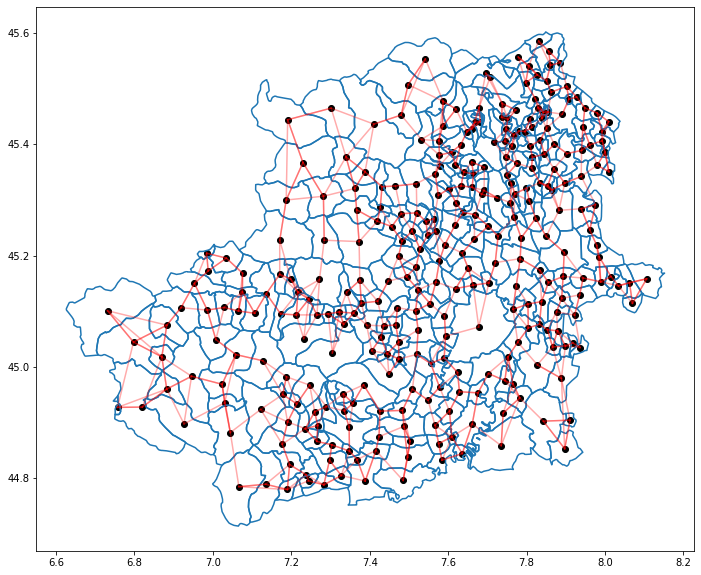

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn3.plot(torino_prov, edge_kws= dict(color = "red", alpha = .33), ax = axis)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff01dc4d320>)

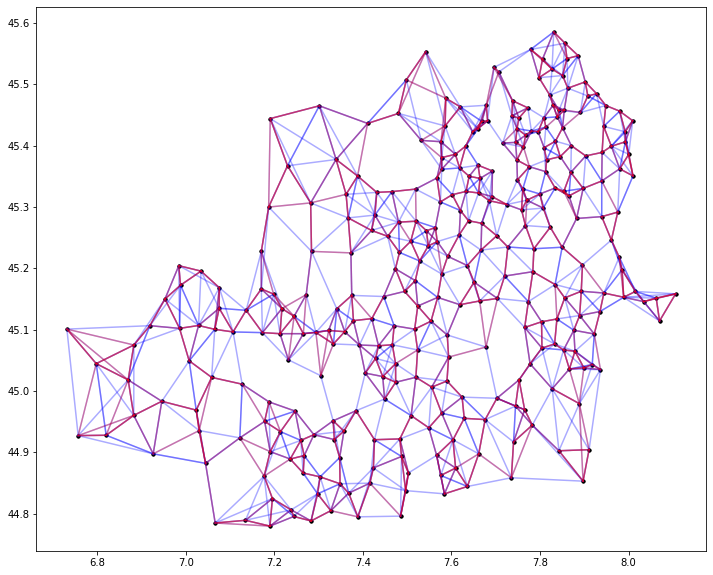

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
#torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33),
            node_kws = dict(marker = "."), ax = axis)
w_knn3.plot(torino_prov, edge_kws=dict(color = "red", alpha = .33 ), 
            node_kws = dict(marker ="."), ax =axis)

Note that every link in the KNN-3 is also contained in the KNN-5. This is because every observation that is one of the top two closest observations to another observation will always be in the closest five as well.

(array([ 14.,  74., 143.,  51.,  19.,   8.,   1.,   1.,   0.,   1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

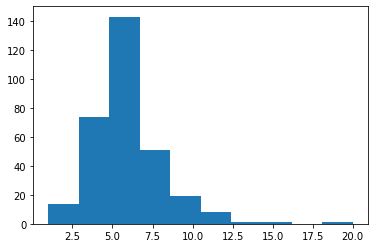

In [ ]:
plt.hist(w_queen.sparse.sum(axis = 1))

(array([  0.,   0.,   0.,   0.,   0., 312.,   0.,   0.,   0.,   0.]),
 array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5]),
 <a list of 10 Patch objects>)

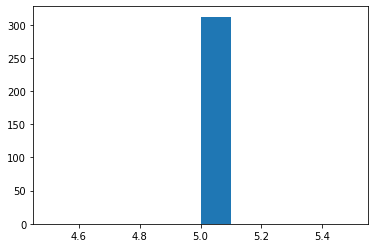

In [ ]:
plt.hist(w_knn5.sparse.sum(axis = 1))

In [ ]:
w_knn5_symmetric = w_knn5.symmetrize()

In [ ]:
w_knn5_symmetric.asymmetries

[]

(array([107.,   0., 109.,   0.,   0.,  75.,   0.,  17.,   0.,   4.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 10 Patch objects>)

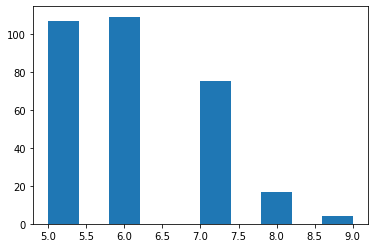

In [ ]:
plt.hist(w_knn5_symmetric.sparse.sum(axis = 1))

### Kernel Weights (Bonus)

Kernel weights reflect spatial relationships that decay with distance. 



In [15]:
triangular = lp.Kernel.from_dataframe(torino_prov)

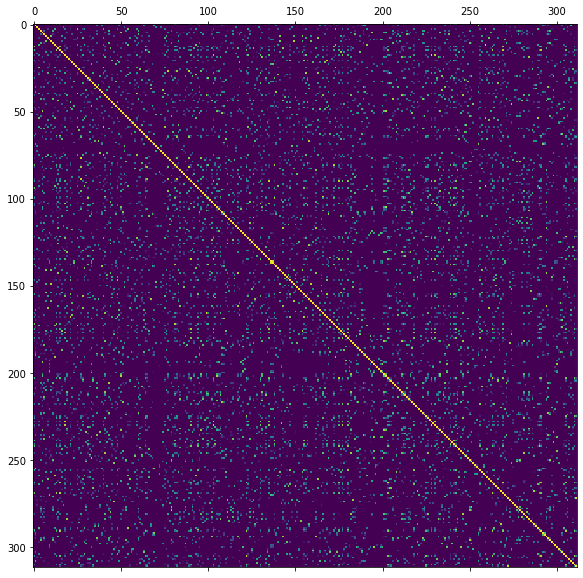

In [20]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(triangular.sparse.toarray())

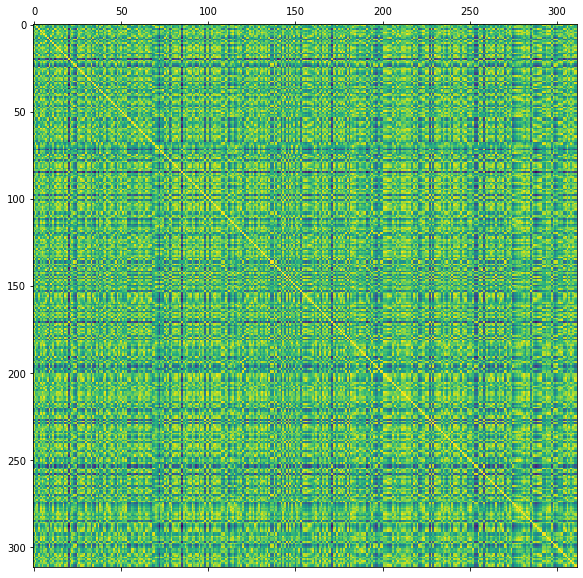

In [22]:
triangular_10 = lp.Kernel.from_dataframe(torino_prov, bandwidth = 10)
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(triangular_10.sparse.toarray())

In [23]:
triangular.bandwidth[0]

array([0.1534496])

In [24]:
triangular_10.bandwidth[0]

array([10.])

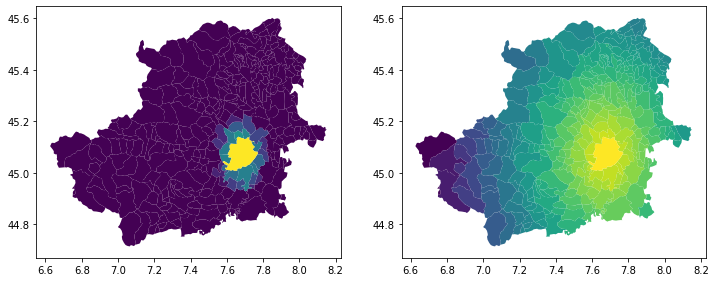

In [30]:
figure, axis = plt.subplots(1,2, 
                            subplot_kw = dict(aspect = "equal"),
                            figsize=(12,8))

flat_weights = triangular.sparse[267].toarray().flatten()
flat_weights_10 = triangular_10.sparse[267].toarray().flatten()

torino_prov.assign(w = flat_weights).plot("w", ax = axis[0])
torino_prov.assign(w = flat_weights_10).plot("w", ax = axis[1])

We can also adjust the function used to generate the kernel. 

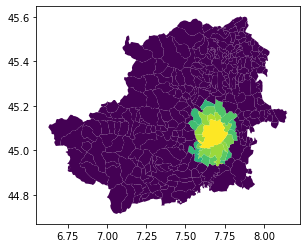

In [32]:
gaussian = lp.Kernel.from_dataframe(torino_prov, function = "gaussian")

flat_weights_g = gaussian.sparse[267].toarray().flatten()
torino_prov.assign(w = flat_weights_g).plot("w")


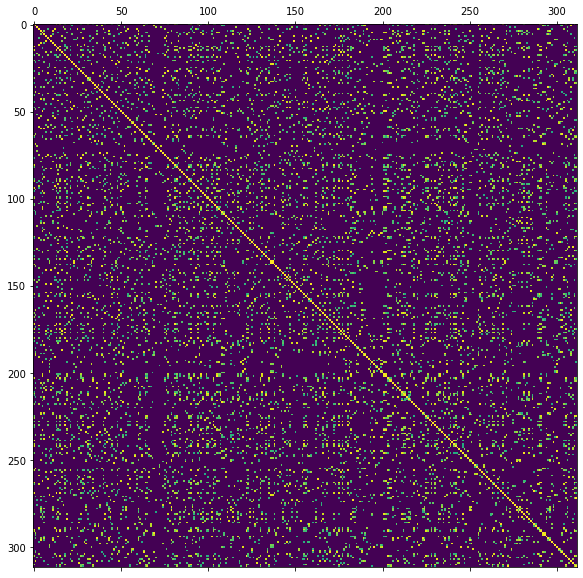

In [33]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(gaussian.sparse.toarray())

Adaptive bandwidth allow for kernels to adjust dynamically

In [34]:
gaussian_adaptive = lp.Kernel.from_dataframe(torino_prov, function = "gaussian", k = 40, fixed = False)

In [35]:
gaussian_adaptive.bandwidth[0]

array([0.11372278])

In [36]:
gaussian_adaptive.bandwidth[1]

array([0.1783534])

(array([ 80., 110.,  60.,  35.,  12.,   7.,   4.,   1.,   1.,   2.]),
 array([0.10910673, 0.14879013, 0.18847353, 0.22815693, 0.26784033,
        0.30752374, 0.34720714, 0.38689054, 0.42657394, 0.46625734,
        0.50594074]),
 <a list of 10 Patch objects>)

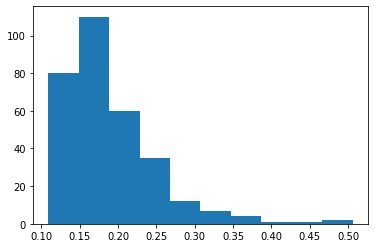

In [37]:
plt.hist(gaussian_adaptive.bandwidth.flatten())

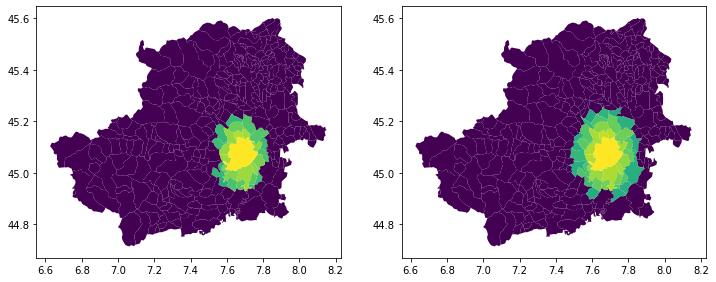

In [39]:
figure, axis = plt.subplots(1,2, subplot_kw= dict(aspect = "equal"), figsize = (12, 8))

weights_gaussian_adaptive  = gaussian_adaptive.sparse[267].toarray().flatten()

torino_prov.assign(w = flat_weights_g).plot("w", ax = axis[0])
torino_prov.assign(w = weights_gaussian_adaptive).plot("w", ax = axis[1])

### A Non-Euclidean Distance: Bray-Curtis

Definition, a few lines on non-euclidean distances

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd

sample_ids = ['A', 'B', 'C']
feature_ids = ['OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5']
data = np.array([[1, 0, 0],
                 [3, 2, 0],
                 [0, 0, 6],
                 [1, 4, 2],
                 [0, 4, 1]])

table1 = pd.DataFrame(data, index=feature_ids, columns=sample_ids)
table1

,A,B,C
OTU1,1,0,0
OTU2,3,2,0
OTU3,0,0,6
OTU4,1,4,2
OTU5,0,4,1


In [40]:
#from scipy.spatial.distance import braycurtis
from skbio.stats.distance import DistanceMatrix

In [41]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [42]:
def df_to_distances(table, pairwise_distance_fn):
  
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = np.zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

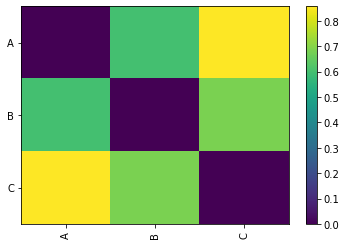

In [43]:
df_to_distances(table1, bray_curtis_distance)

# Matrix Factorization Methods: SVD, PCA, NMF 

Many complex matrix operations cannot be solved efficiently or with stability using the limited precision of computers.

Matrix factorization are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations. Matrix factorization methods, also called matrix decomposition methods, are a foundation of linear algebra in computers, even for basic operations such as solving systems of linear equations, calculating the inverse, and calculating the determinant of a matrix.

## SVD

SVD (Singular Value Decomposition) is one of the above cited methods. Essentially, SVD states that a matrix can be represented as the product of other 3 matrices. Mathematically speaking:

$ A_{nxp} = U_{nxn} S_{nxp} V_{pxp}^T$

where $n$ is the number of samples (i.e. rows), and $p$ is the number of features (i.e. columns). 

Let's build a geometric intuition behind SVD: 
*$A$  is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices $U$, $S$, and $V$.*

**Every matrix is a linear transformation**



In [182]:
# Thanks to https://hadrienj.github.io/, I've adapted his version in order to deal with subplots.

def plotVectors(vecs, cols, alpha=1, ax = None):

    ax = ax or plt.gca()

    #plt.figure(figsize = (6,6))
    ax.axvline(x=0, color='#A9A9A9', zorder=0)
    ax.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)


def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF'], ax = None):
    ax = ax or plt.gca()
    # Unit circle
    x = np.linspace(-1, 1, 10000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    
    plotVectors([u1, v1],ax = ax, cols=[vectorsCol[0], vectorsCol[1]])
    

    ax.plot(x1, y1, 'g', alpha=0.5)
    ax.plot(x1_neg, y1_neg, 'g', alpha=0.5)

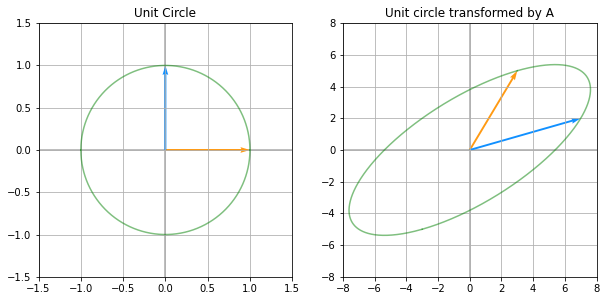

In [188]:
A = np.array([[3, 7], [5, 2]])

figure, axis = plt.subplots(1,2, subplot_kw= dict(aspect = "equal"), figsize = (10, 6))

matrixToPlot(np.array([[1, 0], [0, 1]]), ax = axis[0])
axis[0].grid()
axis[0].set_title("Unit Circle")
axis[0].set_xlim(-1.5, 1.5)
axis[0].set_ylim(-1.5, 1.5)

matrixToPlot(A, ax = axis[1])
axis[1].set_title("Unit circle transformed by A")
axis[1].grid()
axis[1].set_xlim(-8, 8)
axis[1].set_ylim(-8, 8);

In [159]:
U, S, V = np.linalg.svd(A)
U

array([[-0.85, -0.53],
       [-0.53, 0.85]])

In [160]:
S

array([8.71, 3.33])

In [161]:
V

array([[-0.59, -0.80],
       [0.80, -0.59]])

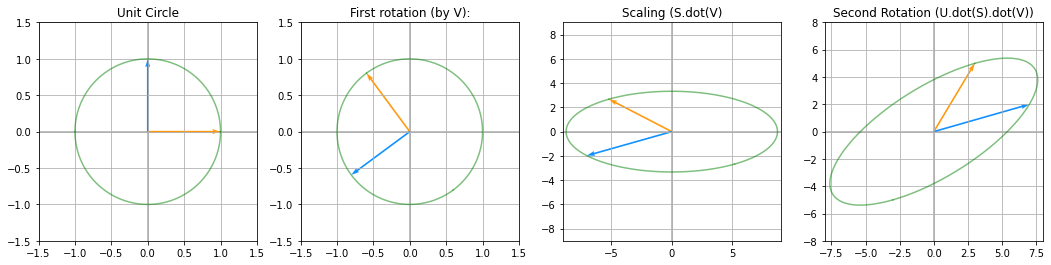

In [192]:
figure, axis = plt.subplots(1,4, subplot_kw= dict(aspect = "equal"), figsize = (18, 12))

matrixToPlot(np.array([[1, 0], [0, 1]]), ax = axis[0])
axis[0].grid()
axis[0].set_title("Unit Circle")
axis[0].set_xlim(-1.5, 1.5)
axis[0].set_ylim(-1.5, 1.5)

matrixToPlot(V, ax = axis[1])
axis[1].set_title("First rotation (by V):")
axis[1].grid()
axis[1].set_xlim(-1.5, 1.5)
axis[1].set_ylim(-1.5, 1.5);

matrixToPlot(np.diag(S).dot(V), ax = axis[2])
axis[2].set_title("Scaling (S.dot(V)")
axis[2].grid()
axis[2].set_xlim(-9, 9)
axis[2].set_ylim(-9, 9);


matrixToPlot(U.dot(np.diag(S)).dot(V), ax = axis[3])
axis[3].set_title("Second Rotation (U.dot(S).dot(V))")
axis[3].grid()
axis[3].set_xlim(-8, 8)
axis[3].set_ylim(-8, 8);

### Singular Values 
The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector ($u_1$) and its norm will be the first singular value ($\sigma_1$).



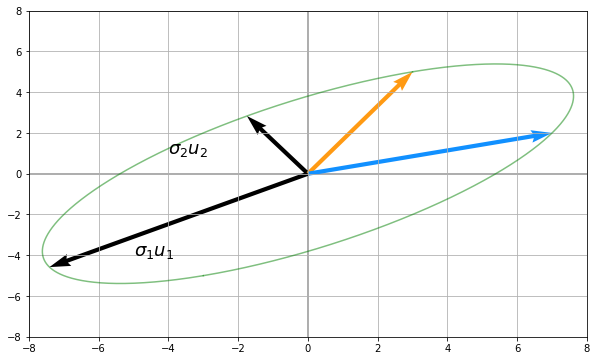

In [197]:
u1 = [S[0]*U[0,0], S[0]*U[0,1]]
v1 = [S[1]*U[1,0], S[1]*U[1,1]]

plt.figure(figsize = (10, 6))
plotVectors([u1, v1], cols=['black', 'black'])
matrixToPlot(A)
plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid()

They are the major ($\sigma_1u_1$) and minor ($\sigma_2u_2$) axes of the elipse. We can see that the feature corresponding to this major axis is associated with more variance (the range of value on this axis is bigger than the other)


Let's now take a look at a simple implementation of SVD with `sklearn`. 
### Look at this face! 

In [88]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [89]:
faces  = fetch_lfw_people(min_faces_per_person= 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [92]:
X, y = faces.images, faces.target
X_res = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

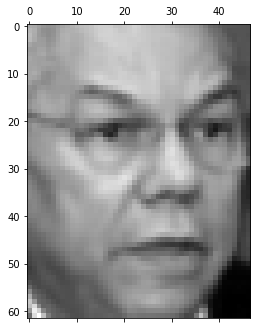

In [93]:
#Example Image
plt.matshow(X[0], cmap = "gray");

In [103]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X_res,y)
rf_original.oob_score_ # https://en.wikipedia.org/wiki/Out-of-bag_error#:~:text=Out%2Dof%2Dbag%20(OOB,data%20samples%20used%20for%20training.

0.6364985163204748

In [131]:
# Optimal number of components

n_comp = [i for i in range(1,100)]
oob_scores = []

for n in n_comp:
  svd = TruncatedSVD(n_components= n)
  X_reduced = svd.fit_transform(X_res)
  rf_reduced = RandomForestClassifier(oob_score=True)
  rf_reduced.fit(X_reduced, y)
  oob_scores.append(rf_reduced.oob_score_)


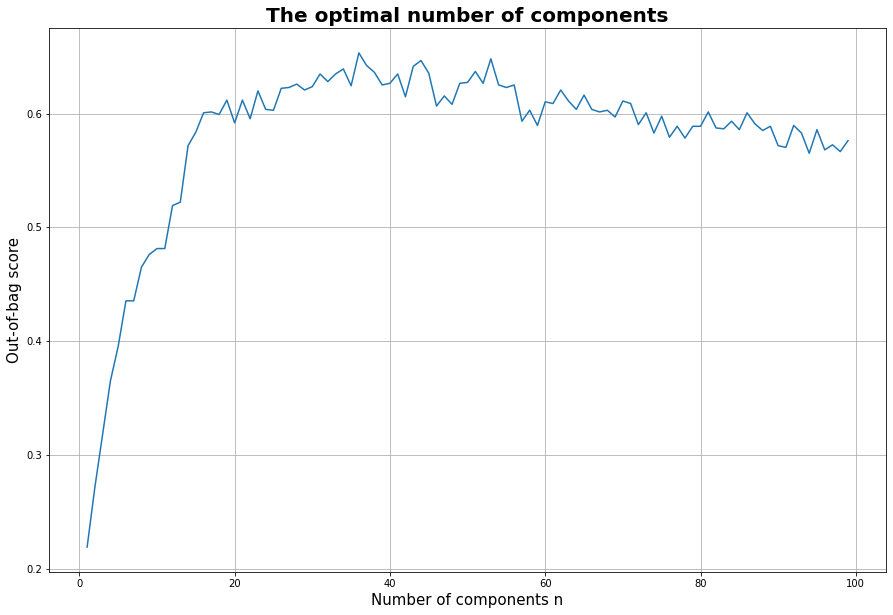

In [133]:
plt.figure(figsize=(15,10))
plt.title('The optimal number of components', fontsize=20, fontweight='bold')
plt.xlabel('Number of components n', fontsize=15)
plt.ylabel('Out-of-bag score', fontsize=15)
plt.grid()
plt.plot(n_comp, oob_scores)

In [132]:
best_n_comp = n_comp[oob_scores.index(max(oob_scores))]
print("Optimal number of neighbors: " + str(best_n_comp))

Optimal number of neighbors: 36


In [134]:
svd = TruncatedSVD(n_components= best_n_comp)
X_reduced = svd.fit_transform(X_res)
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.6313056379821959

In [139]:
svd.explained_variance_ratio_.sum()

0.8102091

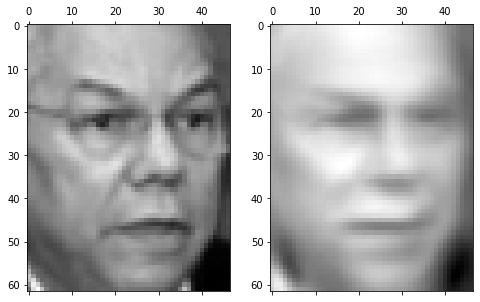

In [140]:
figure, axis = plt.subplots(1,2, subplot_kw= dict(aspect = "equal"), figsize = (8, 5))

image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape(faces.images.shape[1], faces.images.shape[2])

axis[0].matshow(X[0], cmap = "gray")
axis[1].matshow(image_reduced, cmap = "gray");

## PCA 
Principal component analysis (PCA) is a technique that is useful for the compression and classification of data. The purpose is to reduce the dimensionality of a data set (sample) by finding a new set of variables, smaller than the original set of variables, that nonetheless retains most of the sample's information.

By information we mean the variation present in the sample,
given by the correlations between the original variables. The new
variables, called principal components (PCs), are uncorrelated, and are ordered by the fraction of the total information each retains


In [11]:
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
mean = np.array([1, 10])
cov = np.array([[1, 0.8 ],[0.8, 1]])
data = np.random.multivariate_normal(mean, cov, 10000)
X, y = data[:,0], data[:,1]

Text(0, 0.5, 'y')

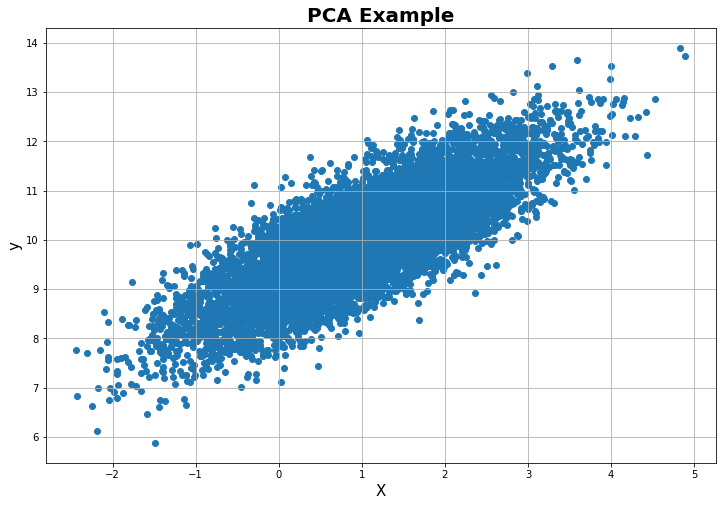

In [23]:
plt.figure(figsize = (12, 8))
plt.scatter(X,y)
plt.grid()
plt.title('PCA Example', fontsize=20, fontweight='bold')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print(pca.components_)

[[ 0.70850187  0.70570893]
 [ 0.70570893 -0.70850187]]


In [31]:
print(pca.explained_variance_)

[1.83738379 0.19991759]


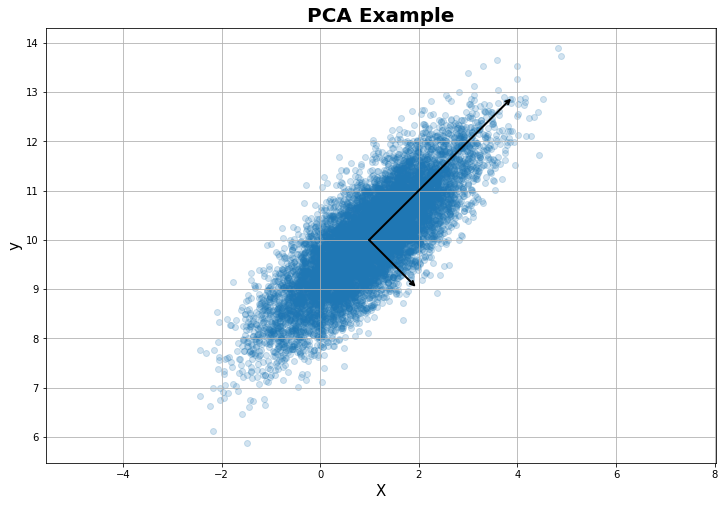

In [36]:
# adapt plotVectors

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize = (12,8))

plt.scatter(X, y, alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('PCA Example', fontsize=20, fontweight='bold')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.grid();


These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

### Dimensionality Reduction

In [37]:
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
print("original shape:   ", data.shape)
print("transformed shape:", data_pca.shape)

original shape:    (10000, 2)
transformed shape: (10000, 1)


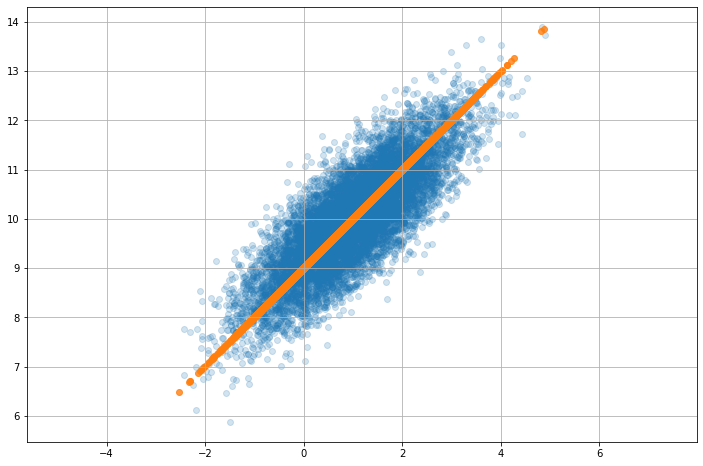

In [39]:
data_new = pca.inverse_transform(data_pca)

plt.figure(figsize = (12,8))
plt.scatter(X, y, alpha=0.2)
plt.scatter(data_new[:, 0], data_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.grid();

### Have you already heard about Eigenfaces?

In [40]:
from sklearn.datasets import fetch_lfw_people
faces  = fetch_lfw_people(min_faces_per_person= 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

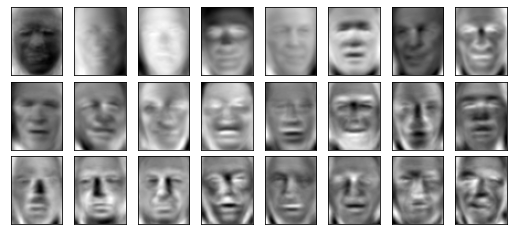

In [42]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='binary_r')

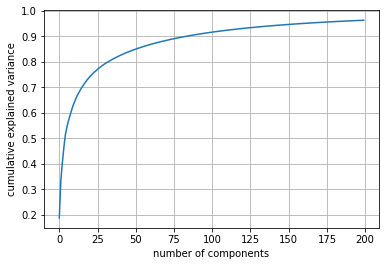

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 62x47 pixel images into 1x200 images. Now to visualize how these images look we need to inverse transform the 1x200 images back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the actual dimension of the original images so we can visualize them.

In [44]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

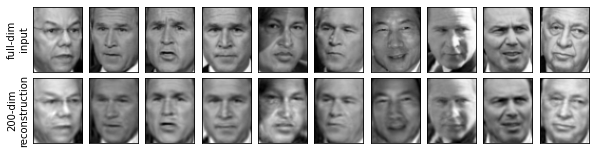

In [45]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('200-dim\nreconstruction');

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Let's see what happens with a out-of-the-dataset face!

In [54]:
!wget https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture7/FaceLec7.jpg

--2020-08-31 10:07:09--  https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture7/FaceLec7.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 544815 (532K) [image/jpeg]
Saving to: ‘FaceLec7.jpg.1’

FaceLec7.jpg.1      100%[===================>] 532.05K  --.-KB/s    in 0.09s   

2020-08-31 10:07:10 (6.11 MB/s) - ‘FaceLec7.jpg.1’ saved [544815/544815]



In [55]:
from skimage.transform import resize
from skimage.color import rgb2gray

import imageio
source_image = imageio.imread("FaceLec7.jpg")
source_image_res = resize(source_image, (62, 47))[..., :3] #mnist-like size
source_image_res = rgb2gray(source_image_res)

courtesy from https://thispersondoesnotexist.com/

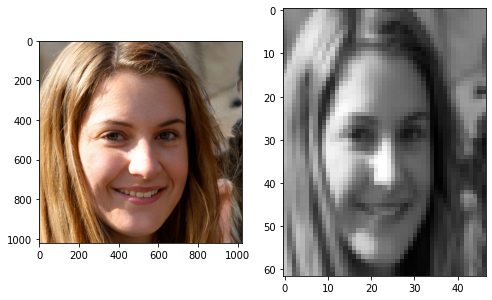

In [57]:
figure, axis = plt.subplots(1,2, subplot_kw= dict(aspect = "equal"), figsize = (8, 5))

axis[0].imshow(source_image)
axis[1].imshow(source_image_res, cmap = "binary_r")

In [50]:
#Reducing dimension into 2 components
component_source_img = pca.transform(source_image_res.reshape(1, -1))
projected_source_img = pca.inverse_transform(component_source_img)

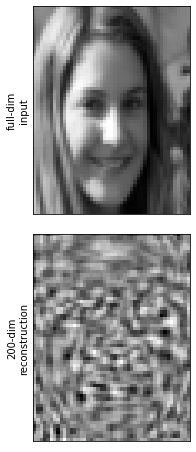

In [51]:
# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

ax[0].imshow(source_image_res, cmap='binary_r')
ax[1].imshow(projected_source_img.reshape(62, 47), cmap='binary_r')
    
ax[0].set_ylabel('full-dim\ninput')
ax[1].set_ylabel('200-dim\nreconstruction');

What is going on here? 


## NMF 

"*Is perception of the whole based on perception of its parts? There is psychological and physiological evidence for parts-based representations in the brain, and certain computational theories of object recognition rely on such representations. But little is known about how brains or computers might learn the parts of objects. Here we demonstrate an algorithm for non-negative matrix factorization that is able to learn parts of faces and semantic features of text. This is in contrast to other methods, such as principal components analysis and vector quantization, that learn holistic, not parts-based, representations*", D.D. Lee & H.S. Seung, Learning the parts of objects by non-negative matrix factorization 

Why and how NMF learns such a representation, completely different from the one from PCA? By describing these methods in a matrix factorization framework. Both methods try to re-construct a matrix $V$ by factorizing it in this way: $V \sim WH$.

PCA constrains the columns of $W$ to be orthonormal and the
rows of $H$ to be orthogonal to each other. This allows a distributed representation in which each face is approximated by a linear combination of all the basis images, or eigenfaces. 

NMF does not allow negative entries in the matrix factors $W$ and
$H$. Only additive combinations are allowed, because the
non-zero elements of $W$ and $H$ are all positive. In contrast to PCA, no subtractions can occur. For these reasons, the non-negativity
constraints are compatible with the intuitive notion of combining
parts to form a whole, which is how NMF learns a parts-based
representation.


https://www.kaggle.com/jinilcs/dimensionality-reduction-pca-nmf-t-sne


## Feature Interactions

## Manifold Learning Methods: t-SNE, UMAP

# References & Additional Material

* https://www.kaggle.com/deepthiar/toydatasets : KNN Data, a nice Kaggle repo

* http://rasbt.github.io/mlxtend/ : MLxtend library

* https://splot.readthedocs.io/en/stable/users/tutorials/weights.html : PySal Docs

* http://readiab.org/ Applied Bioinformatics in Python

* https://en.wikipedia.org/wiki/Matrix_decomposition , Matrix Factorization techniques

* http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/PrincipalComponentAnalysis.pdf: PCA


* https://jakevdp.github.io/PythonDataScienceHandbook/ : Jake VanderPlas, Data Science Handbook

* https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca#:~:text=Singular%20value%20decomposition%20(SVD)%20and,never%20specify%20the%20exact%20relation : relationship between SVD and PCA

* https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf : t-SNE Paper

* https://lvdmaaten.github.io/tsne/ : t-SNE FAQ

